# Assignment - 5 _ Data Analytics 2 -Logestic Regression

##### Kaustubh Shrikant Kabra
##### ERP Number :- 38
##### TE Comp 1

1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

# Loading Social_Network_Ads.csv dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Purchased is the binary data thus it is called the Dependable variable and Age, EstimatedSalary are independent variables

In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
df = df.drop('User ID', axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
from sklearn.preprocessing import OneHotEncoder
df_onehot = pd.get_dummies(df, columns=['Gender'], prefix = ['Gender'])
df_onehot.head(10)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
5,27,58000,0,0,1
6,27,84000,0,1,0
7,32,150000,1,1,0
8,25,33000,0,0,1
9,35,65000,0,1,0


## Data Transformation of Gender into Male and Female gender using 0 and 1

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df_onehot["EstimatedSalary"]=scaler.fit_transform(df_onehot[["EstimatedSalary"]])
Column_loc = ['Age','EstimatedSalary','Gender_Female','Gender_Male','Purchased']
df_onehot = df_onehot[Column_loc]
df_onehot.head(5)

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,19,0.029630,0,1,0
1,35,0.037037,0,1,0
2,26,0.207407,1,0,0
3,27,0.311111,1,0,0
4,19,0.451852,0,1,0


## Initializaing dependent and independent variables

In [11]:
X = df_onehot.iloc[:,:-1].values
print(X)
y = df_onehot.iloc[:,-1].values

[[1.90000000e+01 2.96296296e-02 0.00000000e+00 1.00000000e+00]
 [3.50000000e+01 3.70370370e-02 0.00000000e+00 1.00000000e+00]
 [2.60000000e+01 2.07407407e-01 1.00000000e+00 0.00000000e+00]
 ...
 [5.00000000e+01 3.70370370e-02 1.00000000e+00 0.00000000e+00]
 [3.60000000e+01 1.33333333e-01 0.00000000e+00 1.00000000e+00]
 [4.90000000e+01 1.55555556e-01 1.00000000e+00 0.00000000e+00]]


## Applying train, test, split operatoin on dataset 

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.25, random_state = 4)
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(300, 4) (300,) (100, 4) (100,)


# Logistic Regression
**Logistic Regression** was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.<br>
For example,
 - To predict whether an email is spam (1) or (0)
 - Whether the tumor is malignant (1) or not (0)
 

## Applying logistic regression on trained data 

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X,train_y)    #fitting trainable data

LogisticRegression()

In [14]:
#pridicting Y value using test_X
predict_y = lr.predict(test_X)
predict_y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Calculating accuracy

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict_y)

0.86

## Calulating - Precision and Recall

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(precision_score(test_y, predict_y))
print(recall_score(test_y, predict_y))

0.8076923076923077
0.7


## Confusion Matrix


In [17]:
print(confusion_matrix(test_y, predict_y))
tp,fp, fn, tn = confusion_matrix(test_y, predict_y).ravel()

[[65  5]
 [ 9 21]]


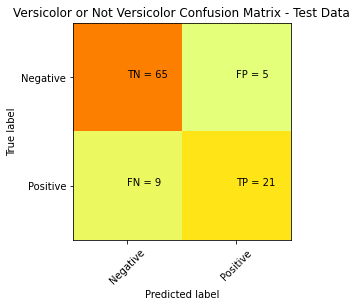

In [24]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## TP FP FN TN

In [19]:
print(f'Correctly Predicted made Purchase {tp}')
print(f'Falsely Predicted made Purchase {fp}')
print(f'Falsely Predicted made did NOT made Purchase {fn}')
print(f'Correctly Predicted made did NOT made Purchase {tn}')

Correctly Predicted made Purchase 65
Falsely Predicted made Purchase 5
Falsely Predicted made did NOT made Purchase 9
Correctly Predicted made did NOT made Purchase 21


In [20]:
Result_Test_X = pd.DataFrame(test_X, columns =['Age','EstimatedSalary','Gender_Female','Gender_Male'])
Result_Predict_y = pd.DataFrame(predict_y, columns= ['Pred_Purchase'])
pd.concat([Result_Test_X, Result_Predict_y], axis=1)

,Age,EstimatedSalary,Gender_Female,Gender_Male,Pred_Purchase
0,33.0,0.333333,1.0,0.0,0
1,27.0,0.511111,1.0,0.0,0
2,25.0,0.533333,0.0,1.0,0
3,38.0,0.259259,1.0,0.0,0
4,27.0,0.540741,0.0,1.0,0
...,...,...,...,...,...
95,45.0,0.222222,1.0,0.0,0
96,32.0,0.777778,0.0,1.0,0
97,21.0,0.422222,0.0,1.0,0
98,45.0,0.125926,0.0,1.0,0


In [21]:
Result_test_y = pd.DataFrame(test_y, columns= ['Purchased'])
Result = pd.concat([Result_Test_X, Result_test_y, Result_Predict_y], axis=1)
Result

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased,Pred_Purchase
0,33.0,0.333333,1.0,0.0,0,0
1,27.0,0.511111,1.0,0.0,0,0
2,25.0,0.533333,0.0,1.0,0,0
3,38.0,0.259259,1.0,0.0,0,0
4,27.0,0.540741,0.0,1.0,0,0
...,...,...,...,...,...,...
95,45.0,0.222222,1.0,0.0,1,0
96,32.0,0.777778,0.0,1.0,1,0
97,21.0,0.422222,0.0,1.0,0,0
98,45.0,0.125926,0.0,1.0,1,0


In [22]:
# Comparing test_y and predicted_y values and saving
Result.to_csv('./Final_Prediction_test_values.csv')